### 1 : Importing Libraries

In [1]:
# ignore the warnings in the output
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import libraries and packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import mlflow
from pycaret.classification import *

 ### 2 Reading Data

In [3]:
##Copy the cleaned data obtained from the data_cleaning notebook into the Data folder before proceeding
%time
dataset = pd.read_csv('Data/cleaned_data.csv')

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.05 µs


In [4]:
dataset.head()

,created_date,city_tier,first_platform_c,first_utm_medium_c,first_utm_source_c,total_leads_droppped,referred_lead,app_complete_flag,assistance_interaction,career_interaction,payment_interaction,social_interaction,syllabus_interaction
0,2021-07-01 00:08:15,1.0,Level0,Level11,Level2,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0
1,2021-07-01 00:16:43,2.0,Level3,Level0,others,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0
2,2021-07-01 00:22:20,1.0,Level3,Level0,Level0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0
3,2021-07-01 00:23:13,1.0,Level1,Level3,others,2.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,2021-07-01 00:28:38,1.0,Level3,Level0,Level0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [5]:
# drop the data column as it is not needed for training
dataset = dataset.drop(['created_date'], axis=1)

### 3 Setting up Environment: 

In [6]:
# create a connection and setup a SQLite database with the name "lead_scoring_model_experimentation.db" in 
# 'Assignment/02_training_pipeline/notebooks/' location

In [7]:
'''
Now you need to start the MLflow server in a new terminal. 
Note: Before you start the MLflow server, create a folder named mlruns in the assignment directory.
Now you need to run the command to start MLflow server such that:
1. The lead_scoring_model_experimentation.db which you created above is used as the backend-store.
2. mlruns folder is used as an artifact directory. 
3. The server runs on the port 6006.

The steps to do so are as follows:
Open a new terminal.
Then go to the Assignment directory using the cd command. Type the command: cd Assignment/
Create a folder named mlruns here. You can create this folder using either the command line or GUI. To create this folder via the command line run the command: mkdir ./mlruns
Then, type the following command to start the MLflow server: 
mlflow server --backend-store-uri='sqlite:///./02_training_pipeline/notebooks/lead_scoring_model_experimentation.db' --default-artifact-root="./mlruns" --port=6006 --host=0.0.0.0
'''

'\nNow you need to start the MLflow server in a new terminal. \nNote: Before you start the MLflow server, create a folder named mlruns in the assignment directory.\nNow you need to run the command to start MLflow server such that:\n1. The lead_scoring_model_experimentation.db which you created above is used as the backend-store.\n2. mlruns folder is used as an artifact directory. \n3. The server runs on the port 6006.\n\nThe steps to do so are as follows:\nOpen a new terminal.\nThen go to the Assignment directory using the cd command. Type the command: cd Assignment/\nCreate a folder named mlruns here. You can create this folder using either the command line or GUI. To create this folder via the command line run the command: mkdir ./mlruns\nThen, type the following command to start the MLflow server: \nmlflow server --backend-store-uri=\'sqlite:///./02_training_pipeline/notebooks/lead_scoring_model_experimentation.db\' --default-artifact-root="./mlruns" --port=6006 --host=0.0.0.0\n'

In [8]:
# Once, your server is successfully running, create a mlflow tracking uri at "http://0.0.0.0:6006"

In [13]:
mlflow.set_tracking_uri("http://0.0.0.0:6006")

In [14]:
# No Pre-Processing 

### 4 : Model Experimentation with pycaret

In [11]:
# create a experimentation with pycaret and exclude ['gbc','knn','qda', 'dummy', 'svm', 'ada']

In [12]:
exclude_models = ['gbc', 'knn', 'qda', 'dummy', 'svm', 'ada']

In [15]:
Baseline_model_exp01 = setup(data = dataset, target = 'app_complete_flag', 
                   session_id = 42,fix_imbalance=False,
                   n_jobs=-1,
                   log_experiment=True,experiment_name='Baseline_model_exp01',
                   log_plots=True, log_data=True,verbose=True,
                   log_profile=False)

,Description,Value
0,Session id,42
1,Target,app_complete_flag
2,Target type,Binary
3,Original data shape,"(238964, 12)"
4,Transformed data shape,"(238964, 44)"
5,Transformed train set shape,"(167274, 44)"
6,Transformed test set shape,"(71690, 44)"
7,Numeric features,8
8,Categorical features,3
9,Preprocess,True


In [16]:
# create a model which gives the highest accuracy

In [17]:
bestModel = compare_models(exclude=exclude_models)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7386,0.8206,0.8346,0.7014,0.7622,0.4767,0.4856,0.3670
xgboost,Extreme Gradient Boosting,0.7385,0.8206,0.8319,0.7022,0.7616,0.4766,0.4850,6.0510
rf,Random Forest Classifier,0.7379,0.8181,0.8211,0.7053,0.7588,0.4754,0.4820,3.3900
et,Extra Trees Classifier,0.7372,0.8172,0.8196,0.7049,0.7579,0.4740,0.4804,4.0730
dt,Decision Tree Classifier,0.7369,0.8166,0.8192,0.7047,0.7577,0.4735,0.4799,0.2190
lr,Logistic Regression,0.7092,0.7828,0.8194,0.6728,0.7388,0.4179,0.4283,2.4640
ridge,Ridge Classifier,0.6995,0.0000,0.7943,0.6691,0.7264,0.3986,0.4058,0.1930
lda,Linear Discriminant Analysis,0.6995,0.7726,0.7943,0.6691,0.7264,0.3986,0.4058,1.4430
nb,Naive Bayes,0.6639,0.7335,0.8708,0.6175,0.7222,0.3267,0.3599,0.7760


Processing:   0%|          | 0/41 [00:00<?, ?it/s]

In [18]:
# create feature importance plot

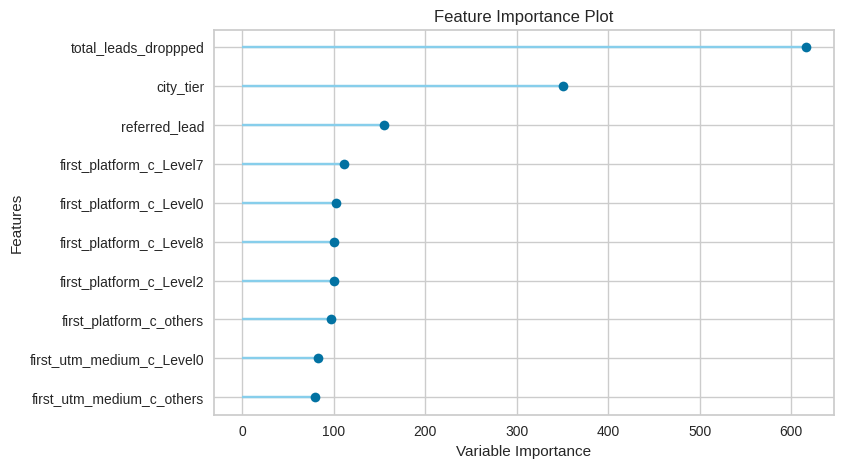

In [19]:
#top 10 features
plot_model(bestModel, plot='feature') #feature_all -> to check for all features 

### 5 : Model Experimentation after dropping features

From the above feature tests we can claerly see that some of the features are not significant. We will now drop all the insignificant features and select only the significant ones.
The list of the significant features is 
['total_leads_droppped', 'city_tier', 'referred_lead', 'app_complete_flag', 'first_platform_c', 'first_utm_medium_c', 'first_utm_source_c'].
So now you will train your model with onlly these features.

Also note that in our previous experiments we saw that tree based models are our top performers. In case of tree based models we do not require transformationss normalization, scaling etc. So make sure that you use setup pycaret in the proper way. i.e, make sure that you use normalize = False and transformation = False.

In [20]:
importantFeatures = ['total_leads_droppped', 'city_tier', 'referred_lead', 'app_complete_flag', 'first_platform_c', 'first_utm_medium_c', 'first_utm_source_c']

In [21]:
# 
# ['total_leads_droppped', 'city_tier', 'referred_lead', 'app_complete_flag', 'first_platform_c', 'first_utm_medium_c', 'first_utm_source_c']
#
# Train the model using the features listed above. Since we are using tree models we do not require any transformaions 
# such as normalization, scaling etc.So make sure that you use setup pycaret in the proper way. i.e, make sure that you use 
# normalize = False and transformation = False.

In [22]:
data_featureImportance = dataset[importantFeatures]

In [23]:
featureImp_clf = setup(data_featureImportance,target = 'app_complete_flag', 
                   session_id = 43,fix_imbalance=False,
                   n_jobs=-1,
                   log_experiment=True,experiment_name='ImportantFeaturesOnlyExpt',
                   log_plots=True, log_data=True,verbose=True,
                   log_profile=False, normalize=False, transformation=False)

,Description,Value
0,Session id,43
1,Target,app_complete_flag
2,Target type,Binary
3,Original data shape,"(238964, 7)"
4,Transformed data shape,"(238964, 39)"
5,Transformed train set shape,"(167274, 39)"
6,Transformed test set shape,"(71690, 39)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


2023/05/14 00:18:42 INFO mlflow.tracking.fluent: Experiment with name 'ImportantFeaturesOnlyExpt' does not exist. Creating a new experiment.


In [24]:
# create a experimentation with pycaret and exclude ['gbc','knn','qda', 'dummy', 'svm', 'ada']. 

In [25]:
bestModel_featureImp = compare_models(exclude=exclude_models)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7381,0.8202,0.8277,0.7032,0.7604,0.4757,0.4835,4.2090
lightgbm,Light Gradient Boosting Machine,0.7377,0.8204,0.8365,0.6998,0.7620,0.4751,0.4845,0.2760
rf,Random Forest Classifier,0.7366,0.8176,0.8249,0.7024,0.7587,0.4728,0.4803,3.1750
et,Extra Trees Classifier,0.7358,0.8166,0.8214,0.7026,0.7574,0.4712,0.4782,3.6930
dt,Decision Tree Classifier,0.7356,0.8161,0.8211,0.7025,0.7572,0.4708,0.4778,0.2240
lr,Logistic Regression,0.7093,0.7834,0.8204,0.6726,0.7392,0.4181,0.4287,1.5140
ridge,Ridge Classifier,0.7001,0.0000,0.7949,0.6696,0.7269,0.3997,0.4070,0.2510
lda,Linear Discriminant Analysis,0.7001,0.7730,0.7950,0.6696,0.7269,0.3998,0.4071,0.6240
nb,Naive Bayes,0.6793,0.7336,0.8540,0.6341,0.7278,0.3576,0.3816,0.2920


Processing:   0%|          | 0/41 [00:00<?, ?it/s]

In [26]:
# You should get lightgbm as the best performing model. So now we will train a lightGBM model manually using pycaret

In [27]:
bestModel_featureImp

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

In [28]:
# Tune the hyper parameters of the lightgbm model using optuna on 10 folds and optimise AUC as that was our system metric, 
# hence we will optimise AUC

In [29]:
# Print the final models configuration so that we can use it in the model retraining pipeline 

In [30]:
gridParams = {
    'learning_rate': [0.005, 0.01, 0.05, 0.1],
    'n_estimators': [8,16,24, 32],
    'num_leaves': [6,8,12,16], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    'objective' : ['binary'],
    'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
    'random_state' : [500],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

In [31]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [32]:
help(tune_model)

Help on function tune_model in module pycaret.classification.functional:

tune_model(estimator, fold: Union[int, Any, NoneType] = None, round: int = 4, n_iter: int = 10, custom_grid: Union[Dict[str, list], Any, NoneType] = None, optimize: str = 'Accuracy', custom_scorer=None, search_library: str = 'scikit-learn', search_algorithm: Optional[str] = None, early_stopping: Any = False, early_stopping_max_iters: int = 10, choose_better: bool = True, fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, return_tuner: bool = False, verbose: bool = True, tuner_verbose: Union[int, bool] = True, return_train_score: bool = False, **kwargs) -> Any
    This function tunes the hyperparameters of a given estimator. The output of
    this function is a score grid with CV scores by fold of the best selected
    model based on ``optimize`` parameter. Metrics evaluated during CV can be
    accessed using the ``get_metrics`` function. Custom metrics can be added
    or removed using 

In [33]:
tuned_lgbm = tune_model(bestModel_featureImp, optimize="AUC", fold=10, n_iter=50, verbose=False, custom_grid=params, error_score="raise")

In [34]:
tuned_model = tuned_lgbm

In [ ]:
pip install shap

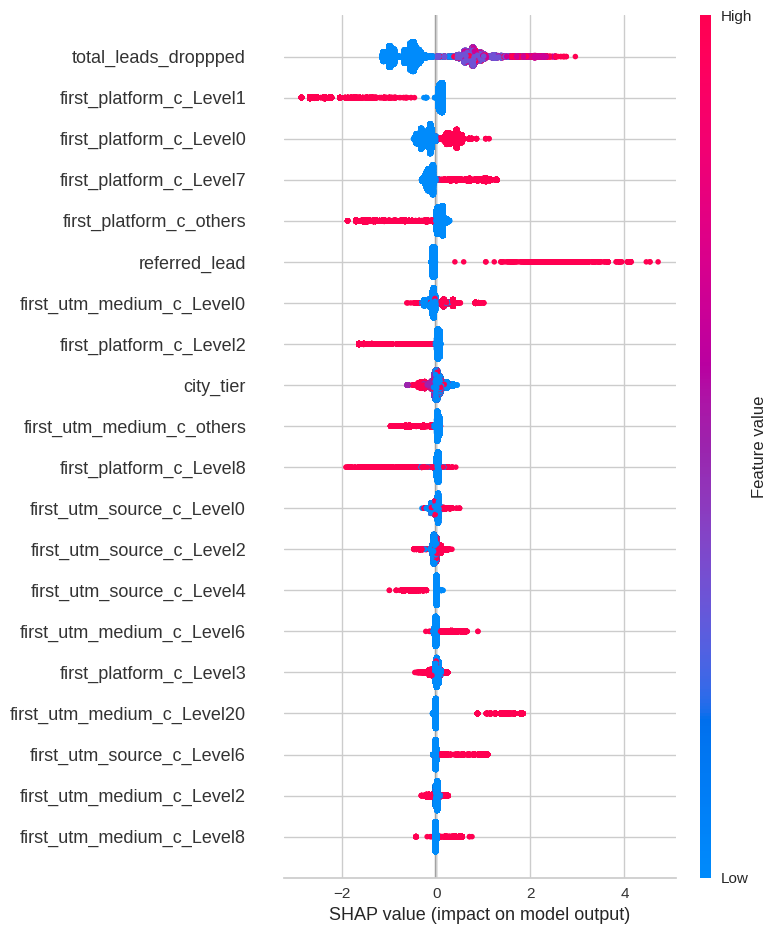

In [29]:
# interpret model
interpret_model(tuned_model)

In [30]:
save_model(tuned_model, "bestModelAfterTuning")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['total_leads_droppped',
                                              'city_tier', 'referred_lead'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',...
                                grow_policy=None, importance_type=None,
                 